In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("hotel_bookings.csv")
df

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


y : is_canceled

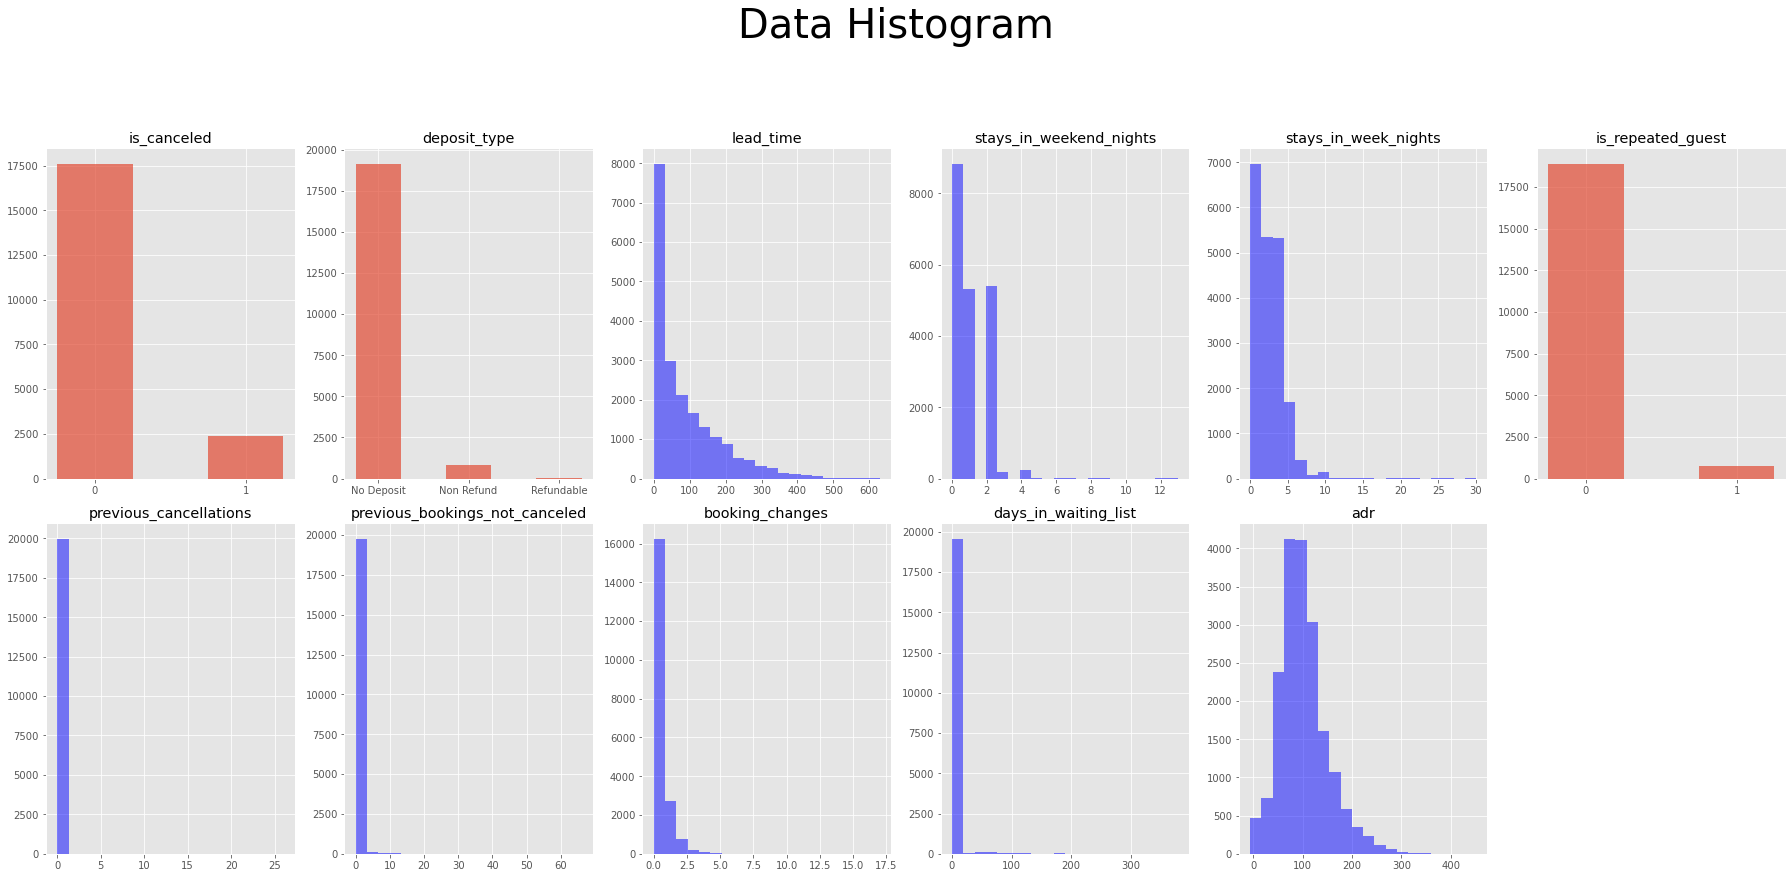

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(25,29))
plt.suptitle('Data Histogram', fontsize=40)

cols=df.columns
for i in range(len(cols)):
    plt.subplot(5,6, i+1)
    plt.title(cols[i])
    if len(df[cols[i]].unique())>5:
        plt.hist(df[cols[i]], bins=20, color='b', alpha=0.5)
    else:
        temp=df[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

is_canceled의 데이터 불균형을 확인

이상치 처리를 해야할 그래프가 확인됨

In [4]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [5]:
df.deposit_type.describe()

count          20000
unique             3
top       No Deposit
freq           19138
Name: deposit_type, dtype: object

### 결측값 대체

In [6]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [7]:
df.dropna(subset=['lead_time'], inplace=True)
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

#최빈값 대체

In [8]:
df['is_repeated_guest']=df['is_repeated_guest'].fillna(0)
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [10]:
fill_mean_func=lambda g: g.fillna(g.mean())
df=df.groupby('deposit_type').apply(fill_mean_func)

df.index=df.index.droplevel(0)
df.sort_index(inplace=True)

df.isna().sum()

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_12616/3258807020.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fill_mean_func=lambda g: g.fillna(g.mean())


is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

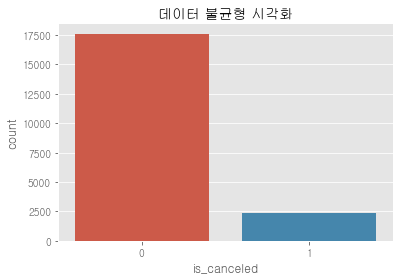

88.0
12.0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path="C:/Windows/Fonts/NGULIM.TTF"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sns.countplot(x='is_canceled', data=df)
plt.title('데이터 불균형 시각화', fontsize=14)
plt.show()

ratio0=round(len(df[df['is_canceled']==0])/len(df)*100, 2)
ratio1=round(len(df[df['is_canceled']==1])/len(df)*100, 2)

print(ratio0)
print(ratio1)

### 오버샘플링 데이터셋 생성

In [13]:
df=pd.get_dummies(df)

In [14]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time

X=df.drop(columns=['is_canceled'])
y=df[['is_canceled']]

In [17]:
start=time.time()
ros=RandomOverSampler(random_state=42)
X_ro, y_ro=ros.fit_resample(X, y)
print("time :", time.time()-start)
#끝난시간-시작시간

time : 0.05167961120605469


In [18]:
start=time.time()
sm=SMOTE(random_state=42)
X_sm, y_sm=sm.fit_resample(X, y)
print("time :", time.time()-start)

time : 0.09413886070251465


랜덤오버샘플링이 좀 더 빠르게 데이터셋 생성

### 분류 알고리즘(원데이터셋 vs 오버샘플링 데이터셋)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#원데이터
start=time.time()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)
rf=RandomForestClassifier(n_estimators=100, min_samples_split=10)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
pred=rf.predict(X_test)
print(accuracy_score(y_test, pred))
print("time :", time.time()-start)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_12616/1864325725.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.9341710427606902
0.9317329332333083
time : 4.488649368286133


In [24]:
#RandomOverSampling
start=time.time()
X_ro_train, X_ro_test, y_ro_train, y_ro_test=train_test_split(X_ro, y_ro, test_size=0.2, stratify=y_ro, random_state=100)
clf_ro=RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_ro.fit(X_ro_train, y_ro_train)
print(clf_ro.score(X_ro_train, y_ro_train))
pred_ro=clf_ro.predict(X_ro_test)
print(accuracy_score(y_ro_test, pred_ro))
print("time :", time.time()-start)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_12616/221996071.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_ro.fit(X_ro_train, y_ro_train)


0.9853651605569764
0.9546746234725775
time : 7.346177816390991


In [25]:
#Smote oversampling
start=time.time()
X_sm_train, X_sm_test, y_sm_train, y_sm_test=train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=100)
clf_sm=RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_sm.fit(X_sm_train, y_sm_train)
print(clf_sm.score(X_sm_train, y_sm_train))
pred_sm=clf_sm.predict(X_sm_test)
print(accuracy_score(y_sm_test, pred_sm))
print("time :", time.time() - start)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_12616/2145407700.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_sm.fit(X_sm_train, y_sm_train)


0.9636970730321114
0.8922989485649332
time : 8.229299783706665
